In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [136]:
steam_data = os.path.join('steam_data', 'steam_games.csv')
steam_data_df = pd.read_csv(steam_data)

## Popular Tags Set

In [137]:
tags = steam_data_df['popular_tags']

In [138]:
all_tags = set()
for tag in tags: 
    if type(tag) is str:
        all_tags = all_tags.union(set(map(lambda x: x.lower(), tag.split(','))))

In [139]:
all_tags

{'1980s',
 "1990's",
 '2.5d',
 '2d',
 '2d fighter',
 '360 video',
 '3d',
 '3d platformer',
 '3d vision',
 '4 player local',
 '4x',
 '6dof',
 'abstract',
 'action',
 'action rpg',
 'action-adventure',
 'addictive',
 'adventure',
 'agriculture',
 'aliens',
 'alternate history',
 'america',
 'animation & modeling',
 'anime',
 'arcade',
 'arena shooter',
 'artificial intelligence',
 'assassin',
 'asymmetric vr',
 'asynchronous multiplayer',
 'atmospheric',
 'atv',
 'audio production',
 'automation',
 'base building',
 'baseball',
 'based on a novel',
 'basketball',
 'batman',
 'battle royale',
 "beat 'em up",
 'beautiful',
 'benchmark',
 'bikes',
 'blood',
 'bmx',
 'board game',
 'bowling',
 'building',
 'bullet hell',
 'bullet time',
 'capitalism',
 'card game',
 'cartoon',
 'cartoony',
 'casual',
 'cats',
 'character action game',
 'character customization',
 'chess',
 'choices matter',
 'choose your own adventure',
 'cinematic',
 'city builder',
 'class-based',
 'classic',
 'clicker',
 

## Number of Players

In [140]:
def get_all_details():
    game_details = set()
    all_details = set()
    for detail in steam_data_df['game_details']: 
        if type(detail) is str:
            all_details = all_details.union(set(map(lambda x: x.lower().strip(), detail.split(','))))
    return all_details

all_details = get_all_details()

In [141]:
category_label = {
    "single": set(), 
    "multi": set(), 
    'unknown': set()
}
for ele in all_details:
    if 'co-op' in ele or 'multi' in ele or 'mmo' in ele:
        category_label['multi'].add(ele)
    elif 'single' in ele:
        category_label['single'].add(ele)
    else:
        category_label['unknown'].add(ele)

print(category_label)

{'single': {'single-player'}, 'multi': {'local co-op', 'online multi-player', 'multi-player', 'online co-op', 'cross-platform multiplayer', 'co-op', 'mmo', 'local multi-player'}, 'unknown': {'game demo', 'in-app purchases', 'steam trading cards', 'stats', 'steam is learning about this downloadable content', 'steamvr collectibles', 'full controller support', 'steam achievements', 'profile features limited', 'steam is learning about this game', 'valve anti-cheat enabled', 'steam leaderboards', 'mods', 'captions available', 'partial controller support', 'shared/split screen', 'commentary available', 'steam cloud', 'steam workshop', 'downloadable content', 'includes source sdk', 'mods (require hl2)', 'includes level editor', 'steam turn notifications', 'steam is learning about this software'}}


In [142]:
number_of_players = {
    "single-player": 0, 
    "multiple-player": 0, 
    "single-and-multiple": 0, 
    'unknown': 0
}

In [143]:
index = 0
for detail in steam_data_df['game_details']:
    if type(detail) is str:
        info = set(detail.lower().split(','))
        is_single = len(info.intersection(category_label['single'])) > 0
        is_multi = len(info.intersection(category_label['multi'])) > 0
        if is_single and is_multi:
            number_of_players['single-and-multiple'] += 1
        elif is_single:
            number_of_players['single-player'] += 1
        elif is_multi:
            number_of_players['multiple-player'] += 1
        else:
            number_of_players["unknown"] += 1  
    else:
        number_of_players["unknown"] += 1  
    index += 1

In [144]:
# steam_data_df.iloc[0]

In [145]:
number_of_players

{'single-player': 27202,
 'multiple-player': 2737,
 'single-and-multiple': 9261,
 'unknown': 1633}

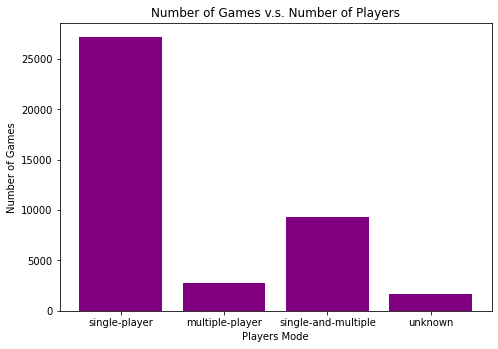

In [146]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
player_types = list(number_of_players.keys())
stats = list(number_of_players.values())
ax.set_ylabel('Number of Games')
ax.set_xlabel('Players Mode')
ax.set_title('Number of Games v.s. Number of Players')
ax.bar(player_types,stats, color='purple')
plt.show()

In [147]:
index = 0
unknown_games_idx = set()
for detail in steam_data_df['game_details']:
    if type(detail) is str:
        info = set(detail.lower().split(','))
        is_single = len(info.intersection(category_label['single'])) > 0
        is_multi = len(info.intersection(category_label['multi'])) > 0
        if not is_single and not is_multi:
            unknown_games_idx.add(index)
    else:
        unknown_games_idx.add(index)
    index += 1

genres_info_list = []
for game in unknown_games_idx:
    genre = steam_data_df.iloc[game]['genre']
    if type(genre) is str:
        genres_info_list.append(steam_data_df.iloc[game]['genre'].split(','))

In [148]:
all_unknown_players_genres = set()
for val in genres_info_list:
    val_set = set(val)
    all_unknown_players_genres.update(val_set)
print(all_unknown_players_genres)

{'Software Training', 'Sports', '360 Video', 'RPG', 'Game Development', 'Accounting', 'Video Production', 'Valve', 'Web Publishing', 'Utilities', 'HTC', 'Early Access', 'Indie', 'Short', 'Animation & Modeling', 'Strategy', 'Action', 'Massively Multiplayer', 'Simulation', 'Casual', 'Movie', 'Racing', 'Education', 'Nudity', 'Audio Production', 'Violent', 'Free to Play', 'Design & Illustration', 'Adventure', 'Photo Editing'}


utility_num = 1010
not_utility_num = 250


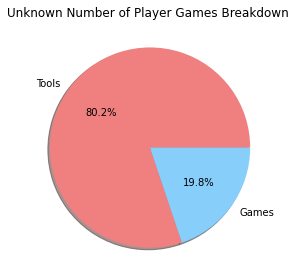

In [149]:
utility_set = {
    'Software Training', 'Game Development', 'Accounting', 
    'Video Production', 'Web Publishing', 'Utilities', 'Simulation', 
    'Design & Illustration', 'Audio Production', 'Photo Editing', 
    'Animation & Modeling'}

utility_num = 0
not_utility_num = 0
for val in genres_info_list:
    val_set = set(val)
    if val_set.intersection(utility_set):
        utility_num += 1
    else:
        not_utility_num += 1
print(f'utility_num = {utility_num}')
print(f'not_utility_num = {not_utility_num}')


y = np.array([utility_num, not_utility_num])
mylabels = ["Tools", "Games"]
colors = ['lightcoral', 'lightskyblue']
plt.pie(y, labels = mylabels, colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Unknown Number of Player Games Breakdown ")
plt.tight_layout()
plt.show() 

## Genre

In [150]:
def get_all_genres():
    genre_set = set()
    for genre in steam_data_df['genre']: 
        if type(genre) is str:
            genre_set = genre_set.union(set(map(lambda x: x.strip(), genre.split(','))))
    return genre_set

genres = get_all_genres()

In [151]:
genres

{'360 Video',
 'Accounting',
 'Action',
 'Adventure',
 'Animation & Modeling',
 'Audio Production',
 'Casual',
 'Design & Illustration',
 'Documentary',
 'Early Access',
 'Education',
 'Free to Play',
 'Game Development',
 'Gore',
 'HTC',
 'Indie',
 'Massively Multiplayer',
 'Movie',
 'Nudity',
 'Photo Editing',
 'RPG',
 'Racing',
 'Sexual Content',
 'Short',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Tutorial',
 'Utilities',
 'Valve',
 'Video Production',
 'Violent',
 'Web Publishing'}

In [152]:
def num_genres():
    genre_num_dict = dict()
    for genre in steam_data_df['genre']: 
        if type(genre) is str:
            genre_set = set(map(lambda x: x.strip(), genre.split(',')))
            if len(genre_set) == 1:
                genre_num_dict['one genre'] = genre_num_dict.get('one genre', 0) + 1
            elif len(genre_set) > 1:
                genre_num_dict['multiple genres'] = genre_num_dict.get('multiple genres', 0) + 1
            else:
                genre_num_dict['unknown'] = genre_num_dict.get('unknown', 0) + 1
    return genre_num_dict

num_genres = num_genres()
print(num_genres)

{'one genre': 8221, 'multiple genres': 32174}


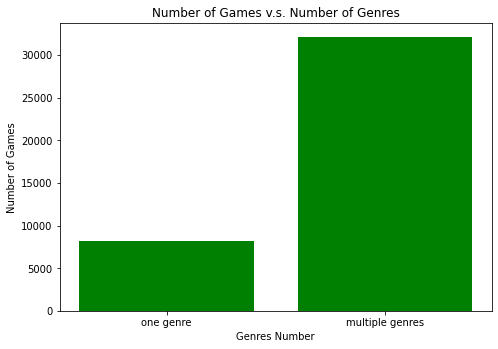

In [153]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
player_types = list(num_genres.keys())
stats = list(num_genres.values())
ax.set_ylabel('Number of Games')
ax.set_xlabel('Genres Number')
ax.set_title('Number of Games v.s. Number of Genres')
ax.bar(player_types,stats, color='Green')
plt.show()

In [164]:
steam_data_df_sample = steam_data_df.head(100)
steam_data_df_sample.to_csv(os.path.join('steam_data', 'steam_games_sample.csv'))